In [20]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
import pandas as pd
data='/home/luis/Desktop/PDG/data/flair_df.csv'
try:
    df = pd.read_csv(data)
    display(df.head())
except FileNotFoundError:
    print("Error: 'flair_df.csv' not found. Please ensure the file exists in the current directory.")
    df = None # Assign None to df in case of error
except pd.errors.ParserError:
    print("Error: Could not parse 'flair_df.csv'. Please check the file format.")
    df = None # Assign None to df in case of error

,Unnamed: 0.1,Unnamed: 0,PyRadiomics/Versions/diagnostics,Numpy/Versions/diagnostics,SimpleITK/Versions/diagnostics,PyWavelet/Versions/diagnostics,Python/Versions/diagnostics,Settings/Configuration/diagnostics,EnabledImageTypes/Configuration/diagnostics,Hash/Image-original/diagnostics,...,SmallAreaLowGrayLevelEmphasis/glszm/original,ZoneEntropy/glszm/original,ZonePercentage/glszm/original,ZoneVariance/glszm/original,Busyness/ngtdm/original,Coarseness/ngtdm/original,Complexity/ngtdm/original,Contrast/ngtdm/original,Strength/ngtdm/original,highGrade
0,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1ffbffc2fc605b7d5ef1c3b2a790d8a98c93f4dd,...,0.045654,4.696937,0.057143,4440.166667,4.608822,0.007719,5.665917,0.021313,0.109595,True
1,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},7b22c2b1767617dc0d3db815ae703599ce4e1f62,...,0.047595,5.422075,0.103538,829.483942,6.779884,0.004074,11.919254,0.028828,0.088929,True
2,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},87a8f9a8fefc50209701c5ec696c5e72e40c0e15,...,0.031491,5.453404,0.162454,945.911273,4.835655,0.002515,32.396035,0.017710,0.130043,True
3,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},efd706b8f24a144f47c8533ddda2b644b7f4896a,...,0.037158,5.047446,0.086413,2961.200744,2.635198,0.006769,12.410246,0.021700,0.228678,True
4,0,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b4dd0e54af5ed18fe1f1b6f526f1fbd8b1b4d60a,...,0.005191,5.763565,0.272459,85.110375,0.527647,0.006528,96.167007,0.037276,0.891463,True


### Basic preprocessing

In [22]:
for col in df.columns:
    print(col)

Unnamed: 0.1
Unnamed: 0
PyRadiomics/Versions/diagnostics
Numpy/Versions/diagnostics
SimpleITK/Versions/diagnostics
PyWavelet/Versions/diagnostics
Python/Versions/diagnostics
Settings/Configuration/diagnostics
EnabledImageTypes/Configuration/diagnostics
Hash/Image-original/diagnostics
Dimensionality/Image-original/diagnostics
Spacing/Image-original/diagnostics
Size/Image-original/diagnostics
Mean/Image-original/diagnostics
Minimum/Image-original/diagnostics
Maximum/Image-original/diagnostics
Hash/Mask-original/diagnostics
Spacing/Mask-original/diagnostics
Size/Mask-original/diagnostics
BoundingBox/Mask-original/diagnostics
VoxelNum/Mask-original/diagnostics
VolumeNum/Mask-original/diagnostics
CenterOfMassIndex/Mask-original/diagnostics
CenterOfMass/Mask-original/diagnostics
10Percentile/firstorder/original
90Percentile/firstorder/original
Energy/firstorder/original
Entropy/firstorder/original
InterquartileRange/firstorder/original
Kurtosis/firstorder/original
Maximum/firstorder/original

In [23]:
df.set_index('Id', inplace=True)
df.shape

(128, 117)

In [24]:
# HIGH and LOW grades balance

print('LOW: ', df[df['highGrade']==False].shape[0]/df.shape[0]) 

print('HIGH: ', df[df['highGrade']==True].shape[0]/df.shape[0]) 

LOW:  0.2265625
HIGH:  0.7734375


In [25]:
# separates object columns containing mainly metadata from 
# the nuemrical columns containing actual radiomic values

df_meta=df.select_dtypes(include=['object'])
df.drop(columns = df_meta.columns, inplace=True)
df.shape    

(128, 106)

In [26]:
df_meta.head()

,Unnamed: 0,PyRadiomics/Versions/diagnostics,Numpy/Versions/diagnostics,SimpleITK/Versions/diagnostics,PyWavelet/Versions/diagnostics,Python/Versions/diagnostics,Settings/Configuration/diagnostics,EnabledImageTypes/Configuration/diagnostics,Hash/Image-original/diagnostics,Dimensionality/Image-original/diagnostics,Hash/Mask-original/diagnostics
Id,,,,,,,,,,,
0.783201,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1ffbffc2fc605b7d5ef1c3b2a790d8a98c93f4dd,3D,731b2f2113593782807db4b12219c2641780e152
0.729412,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},7b22c2b1767617dc0d3db815ae703599ce4e1f62,3D,fa7105c5cad49bbeda063571fc091b6740bd8045
0.662097,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},87a8f9a8fefc50209701c5ec696c5e72e40c0e15,3D,4181a8a9f56aa706f630c2ec846e2b2ef8f29a0a
0.782308,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},efd706b8f24a144f47c8533ddda2b644b7f4896a,3D,1f79e01ce7d0e1d9fba7008e5ecfb3d13ca6f1ad
0.585369,Segmentation_segment_Segment_1,v3.1.0.post2+g146e3bd,1.26.4,2.4.0rc2.dev213,1.6.0,3.9.10,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b4dd0e54af5ed18fe1f1b6f526f1fbd8b1b4d60a,3D,5e41117b1288a4f7b6599cccb046a09621df0248


### Statistics

Missing values per column:
 Unnamed: 0.1                          0
Spacing/Image-original/diagnostics    0
Size/Image-original/diagnostics       0
Mean/Image-original/diagnostics       0
Minimum/Image-original/diagnostics    0
                                     ..
Coarseness/ngtdm/original             0
Complexity/ngtdm/original             0
Contrast/ngtdm/original               0
Strength/ngtdm/original               0
highGrade                             0
Length: 106, dtype: int64

Number of duplicated rows: 0

Summary Statistics:
        Unnamed: 0.1  Spacing/Image-original/diagnostics  \
count         128.0                          128.000000   
mean            0.0                            2.246744   
std             0.0                            1.699386   
min             0.0                            0.181618   
25%             0.0                            0.953674   
50%             0.0                            1.210785   
75%             0.0                      

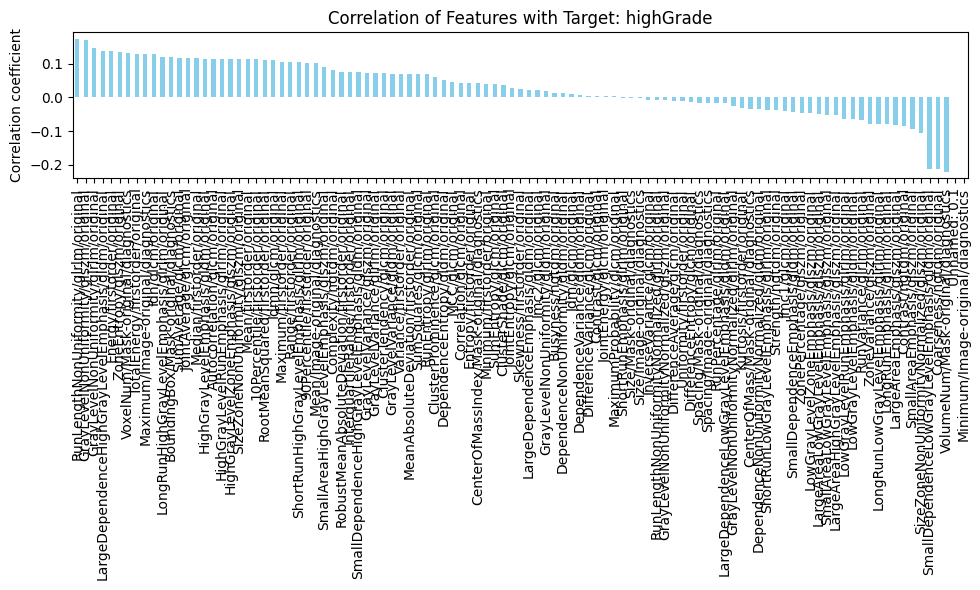

'\n# Histograms of numerical features\ndf.hist(figsize=(20, 20), bins=50)\nplt.suptitle("Histograms of Numerical Features")\nplt.show()\n\n# Pairplot for a subset of features\nsns.pairplot(df[[\'Strength\', \'Size.a\', \'Size.b\', \'Size.c\']], diag_kind="kde")\nplt.suptitle("Pairplot of Selected Features")\nplt.show()'

In [27]:
### Numerical Statistiques

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Check for duplicated rows
print(f"\nNumber of duplicated rows: {df.duplicated().sum()}")

# Summary statistics
print("\nSummary Statistics:\n", df.describe())


correlation_with_target = df.corr()['highGrade'].drop('highGrade').sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Target: highGrade')
plt.ylabel('Correlation coefficient')
plt.tight_layout()
plt.show()


'''
# Histograms of numerical features
df.hist(figsize=(20, 20), bins=50)
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Pairplot for a subset of features
sns.pairplot(df[['Strength', 'Size.a', 'Size.b', 'Size.c']], diag_kind="kde")
plt.suptitle("Pairplot of Selected Features")
plt.show()'''

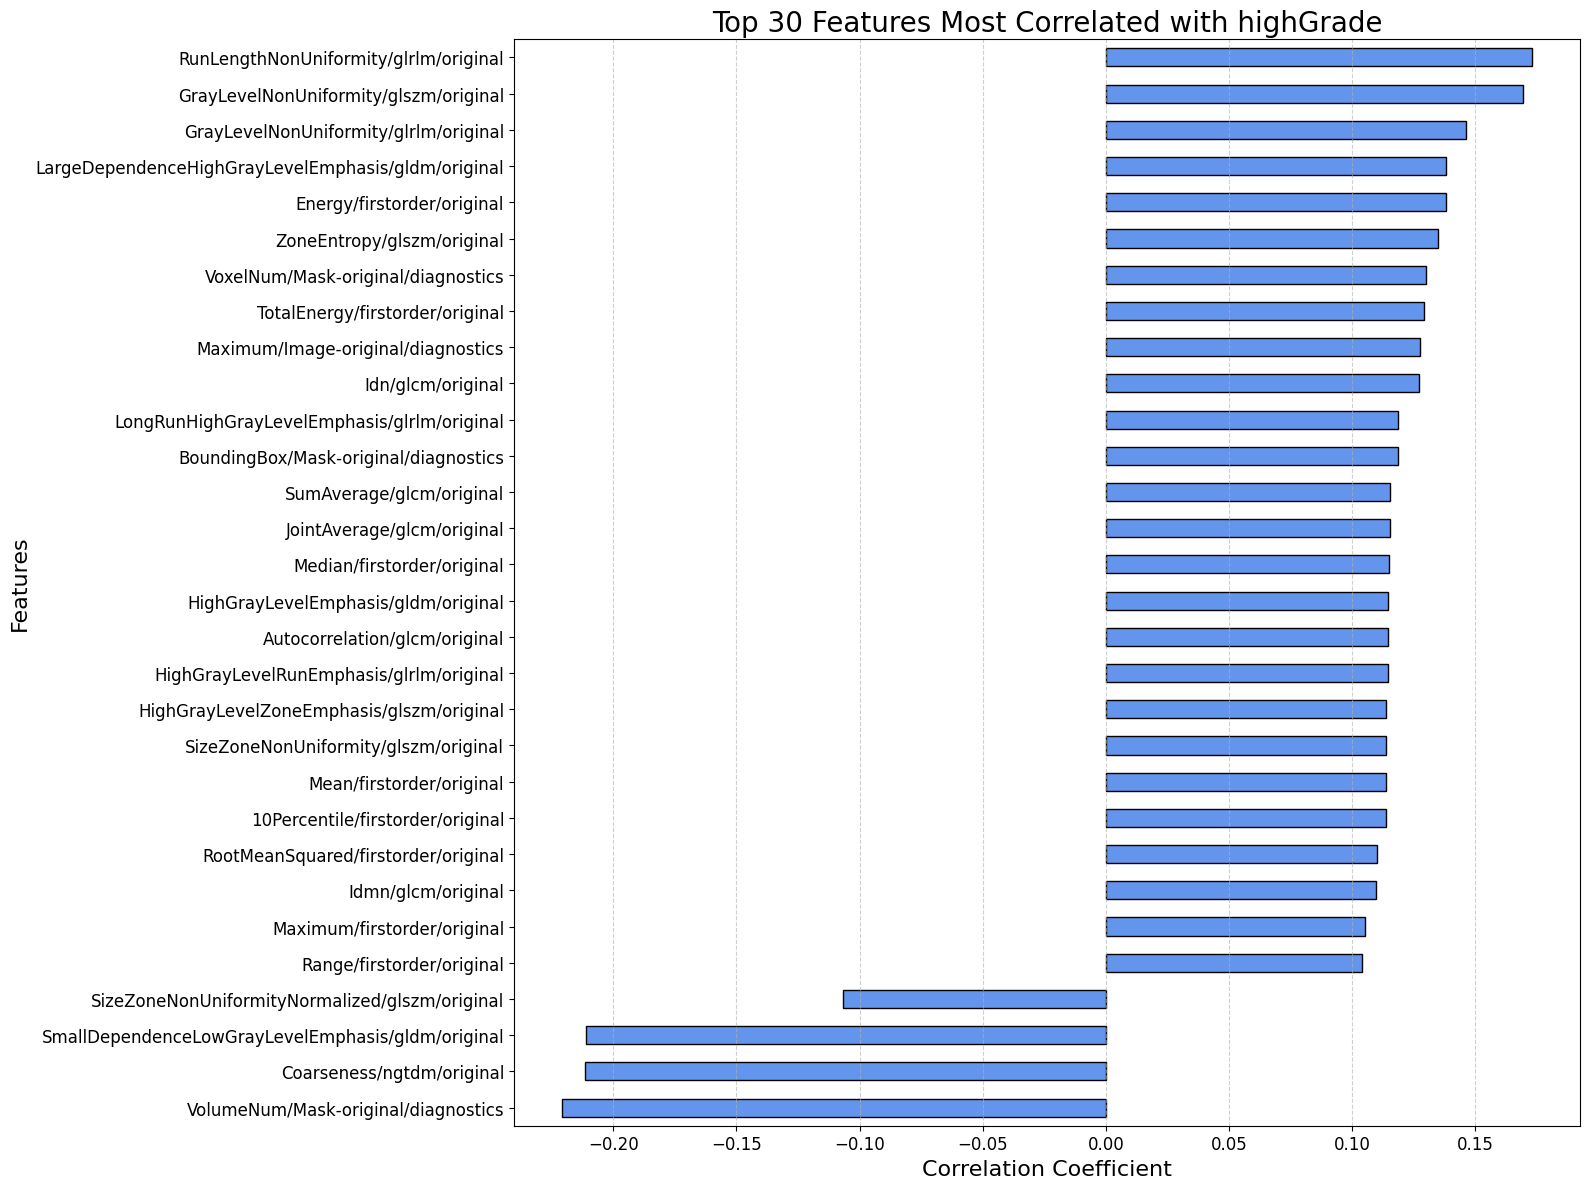

In [28]:

# Get top 30 features by absolute correlation
top_30 = correlation_with_target.abs().sort_values(ascending=False).head(30)

# Retrieve original signed correlations for those top 30 features
top_30_signed = correlation_with_target[top_30.index]


# Plot
plt.figure(figsize=(16, 12))  # Bigger figure size
top_30_signed.sort_values().plot(
    kind='barh',
    color='cornflowerblue',
    edgecolor='black'
)

plt.title('Top 30 Features Most Correlated with highGrade', fontsize=20)
plt.xlabel('Correlation Coefficient', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Outliers

In [29]:
#getting targets
targets=df[['highGrade']]

df.drop(columns=['highGrade'], inplace=True)

In [30]:
df_cp=df.copy()

### General Outliers

total out:  33
105


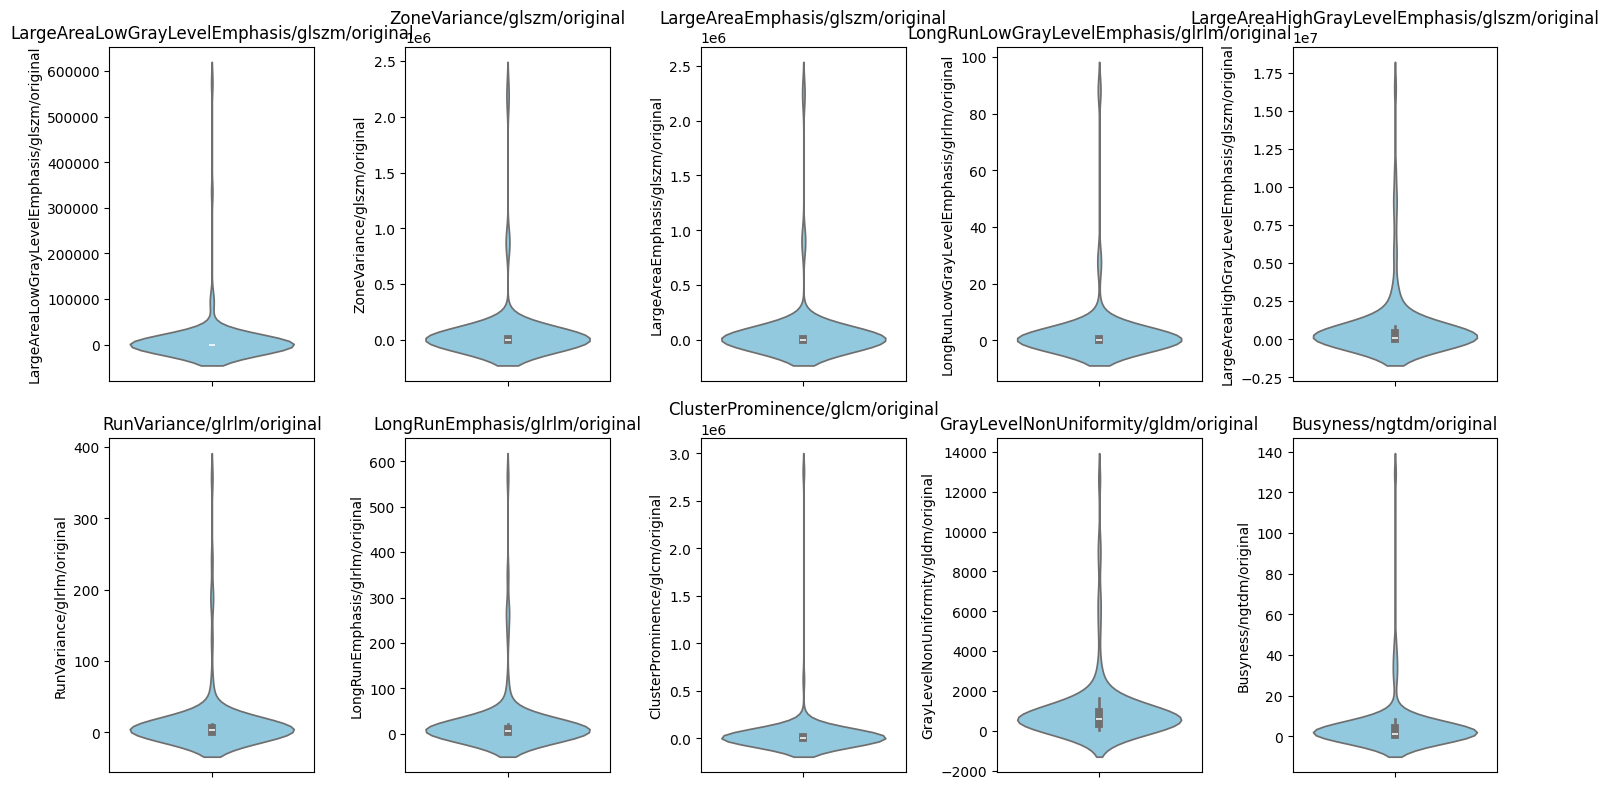

In [31]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
multiplier=8
outliers_count = ((df < (Q1 - multiplier* IQR)) | (df > (Q3 + multiplier* IQR))).sum()

totalOut = sum(x > 0 for x in outliers_count)
print('total out: ', totalOut)

# Seleccionar las 10 columnas con mas valores atipicos
top_outlier_cols = outliers_count.sort_values(ascending=False).head(10).index.tolist()

outliers_count.sort_values(ascending=False).index.tolist()
print(len(outliers_count.sort_values(ascending=False).index.tolist()))

plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_cols):
    plt.subplot(2, 5, i + 1)  
    sns.violinplot(y=df[col], color="skyblue")
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

### Low Grade Outliers

/tmp/ipykernel_17295/3208747073.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['highGrade']=targets['highGrade']


total out:  17
105


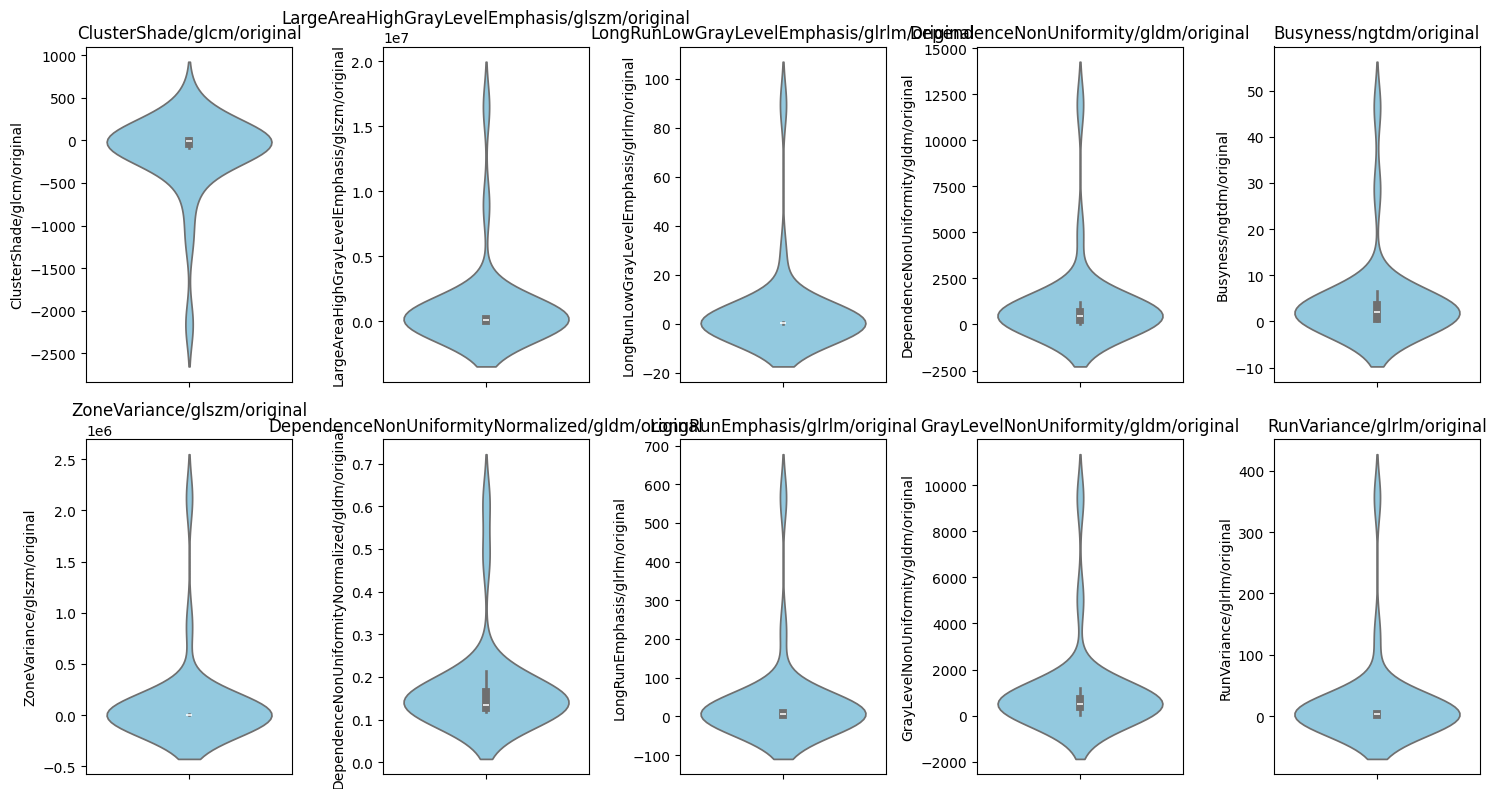

In [32]:

df['highGrade']=targets['highGrade']
df=df[df['highGrade']==False]
df.drop(columns=['highGrade'], inplace=True)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
multiplier=8
outliers_count = ((df < (Q1 - multiplier* IQR)) | (df > (Q3 + multiplier* IQR))).sum()

totalOut = sum(x > 0 for x in outliers_count)
print('total out: ', totalOut)

# Seleccionar las 10 columnas con mas valores atipicos
top_outlier_cols = outliers_count.sort_values(ascending=False).head(10).index.tolist()

outliers_count.sort_values(ascending=False).index.tolist()
print(len(outliers_count.sort_values(ascending=False).index.tolist()))

plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_cols):
    plt.subplot(2, 5, i + 1)  
    sns.violinplot(y=df[col], color="skyblue")
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

### High Grade Outliers

total out:  30
105


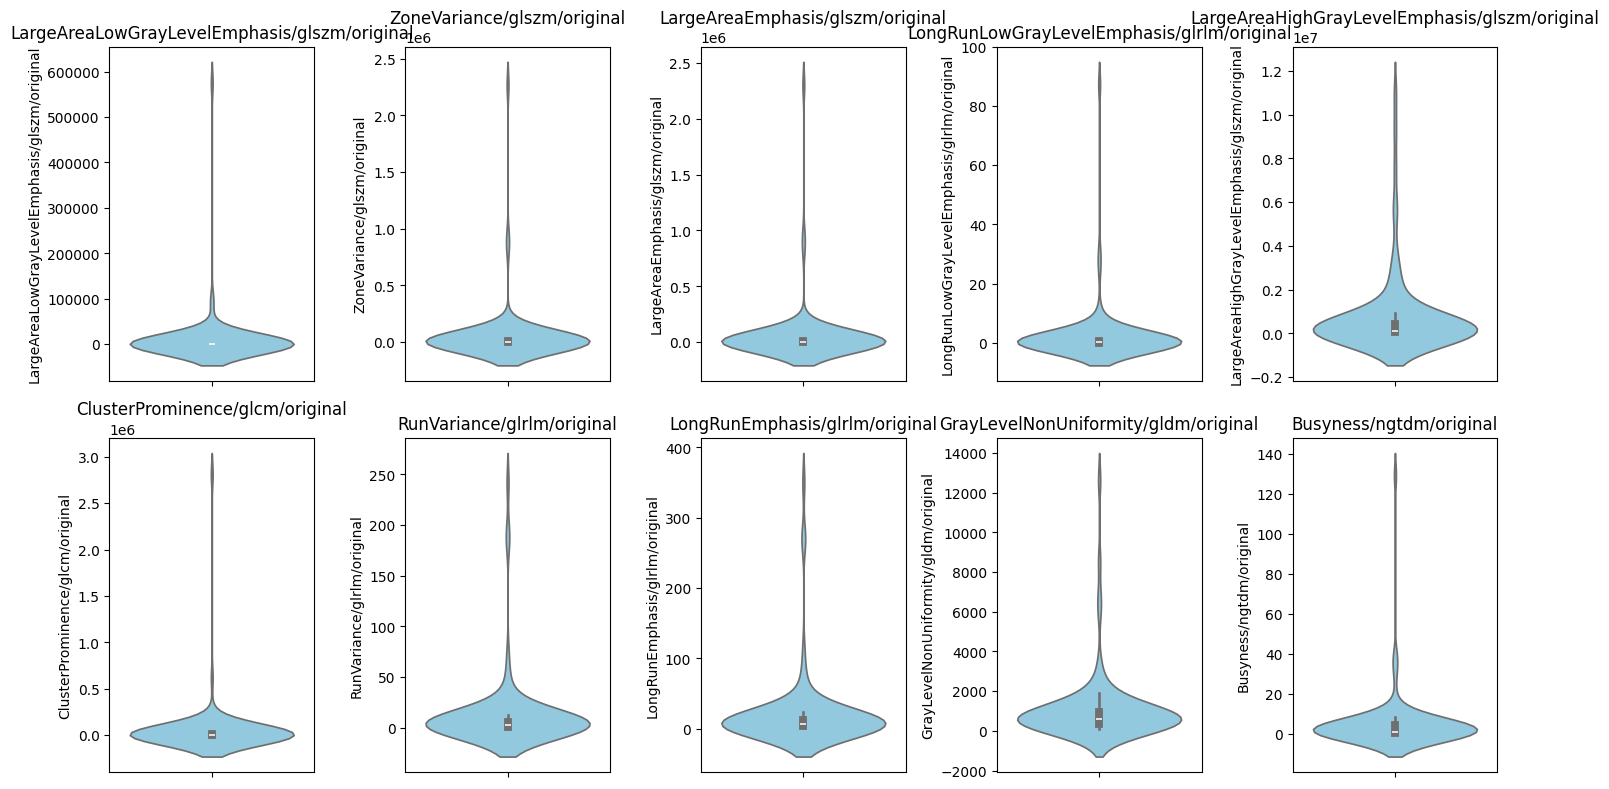

In [33]:

df=df_cp.copy()
df['highGrade']=targets['highGrade']
df=df[df['highGrade']==True]
df.drop(columns=['highGrade'], inplace=True)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
multiplier=8
outliers_count = ((df < (Q1 - multiplier* IQR)) | (df > (Q3 + multiplier* IQR))).sum()

totalOut = sum(x > 0 for x in outliers_count)
print('total out: ', totalOut)

# Seleccionar las 10 columnas con mas valores atipicos
top_outlier_cols = outliers_count.sort_values(ascending=False).head(10).index.tolist()

outliers_count.sort_values(ascending=False).index.tolist()
print(len(outliers_count.sort_values(ascending=False).index.tolist()))

plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_cols):
    plt.subplot(2, 5, i + 1)  
    sns.violinplot(y=df[col], color="skyblue")
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

In [34]:
df=df_cp.copy()
df['highGrade']=targets['highGrade']

In [35]:

df = df.loc[:, df.nunique() > 1]
df

,Spacing/Image-original/diagnostics,Size/Image-original/diagnostics,Mean/Image-original/diagnostics,Maximum/Image-original/diagnostics,Spacing/Mask-original/diagnostics,Size/Mask-original/diagnostics,BoundingBox/Mask-original/diagnostics,VoxelNum/Mask-original/diagnostics,VolumeNum/Mask-original/diagnostics,CenterOfMassIndex/Mask-original/diagnostics,...,SmallAreaLowGrayLevelEmphasis/glszm/original,ZoneEntropy/glszm/original,ZonePercentage/glszm/original,ZoneVariance/glszm/original,Busyness/ngtdm/original,Coarseness/ngtdm/original,Complexity/ngtdm/original,Contrast/ngtdm/original,Strength/ngtdm/original,highGrade
Id,,,,,,,,,,,,,,,,,,,,,
0.783201,1.000000,11534336,18.002486,237.0,1.000000,11534336,1776,1260,1,2.119091e+06,...,0.045654,4.696937,0.057143,4440.166667,4.608822,0.007719,5.665917,0.021313,0.109595,True
0.729412,1.000000,11534336,15.832890,253.0,1.000000,11534336,3431,2685,1,2.404321e+06,...,0.047595,5.422075,0.103538,829.483942,6.779884,0.004074,11.919254,0.028828,0.088929,True
0.662097,0.953674,11534336,17.977700,270.0,0.953674,11534336,4416,3244,1,7.343655e+05,...,0.031491,5.453404,0.162454,945.911273,4.835655,0.002515,32.396035,0.017710,0.130043,True
0.782308,0.726471,12582912,32.582970,314.0,0.726471,12582912,2288,1840,1,7.535787e+05,...,0.037158,5.047446,0.086413,2961.200744,2.635198,0.006769,12.410246,0.021700,0.228678,True
0.585369,3.357910,2163200,133.998494,981.0,3.357910,2163200,2250,1692,1,2.580708e+05,...,0.005191,5.763565,0.272459,85.110375,0.527647,0.006528,96.167007,0.037276,0.891463,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.774391,0.953674,11534336,15.155052,277.0,0.953674,11534336,2392,1889,1,1.099664e+06,...,0.029563,5.046687,0.069349,4020.625255,3.634234,0.005374,10.826227,0.015235,0.146290,False
0.720461,1.031494,11534336,19.229200,325.0,1.031494,11534336,4940,3652,1,1.302393e+06,...,0.058029,5.347434,0.126780,1076.402073,4.376087,0.003218,20.278620,0.031107,0.126415,False
0.601364,3.357910,1996800,213.624087,1411.0,3.357910,1996800,8208,6199,1,1.522708e+05,...,0.002000,6.406543,0.243104,85.288385,0.353731,0.002340,447.587022,0.014982,2.279072,True


In [36]:
import pandas as pd
# Función para detectar y tratar outliers utilizando el IQR
def tratar_outliers_iqr(df, multiplier=8):
    # Selecciona solo las columnas numéricas
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    for col in num_cols:
        # Calcular Q1 (primer cuartil), Q3 (tercer cuartil) y IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definir límites inferior y superior para los outliers
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier* IQR

        # Imprimir los límites de cada columna
        #print(f"{col}: Limite inferior={lower_bound}, Limite superior={upper_bound}")

        # Reemplazar los valores por los límites (capping)
        df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return df

# Aplicar la función para tratar los outliers en el DataFrame
df = tratar_outliers_iqr(df)


In [37]:
df.to_csv('processedFlair.csv', index=True)

In [38]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Function to calculate Cohen's d for numerical columns
def cohens_d(group1, group2):
    mean_diff = group1.mean() - group2.mean()
    pooled_std = np.sqrt(((group1.shape[0]-1)*(group1.std()**2) + (group1.shape[0]-1)*(group2.std()**2)) / (group1.shape[0]+group2.shape[0]-2))
    return np.abs(mean_diff / pooled_std)


high_graders = df[df['highGrade'] == True]
low_graders = df[df['highGrade'] == False]

differences = []


for column in df.columns:
    if column == 'highGrade':
        continue

    # Calculate Cohen's d for numerical columns
    d = cohens_d(high_graders[column], low_graders[column])
    differences.append((column, d, 'numerical'))


# Convert to DataFrame and sort by difference score
diff_df = pd.DataFrame(differences, columns=['Column', 'Difference', 'Type'])
top_10 = diff_df.sort_values(by='Difference', ascending=False).head(30)

# Print results
print("Top 10 columns with largest differences between highGraders and lowGraders:")
print(top_10[['Column', 'Difference', 'Type']])

Top 10 columns with largest differences between highGraders and lowGraders:
                                               Column  Difference       Type
75              RunLengthNonUniformity/glrlm/original    0.374059  numerical
65  SmallDependenceLowGrayLevelEmphasis/gldm/original    0.350334  numerical
82              GrayLevelNonUniformity/glszm/original    0.342483  numerical
13                         Energy/firstorder/original    0.340941  numerical
99                          Coarseness/ngtdm/original    0.312073  numerical
66              GrayLevelNonUniformity/glrlm/original    0.311097  numerical
60  LargeDependenceHighGrayLevelEmphasis/gldm/orig...    0.302397  numerical
26                    TotalEnergy/firstorder/original    0.278149  numerical
7                  VoxelNum/Mask-original/diagnostics    0.275115  numerical
3                  Maximum/Image-original/diagnostics    0.274544  numerical
95                         ZoneEntropy/glszm/original    0.274464  numerical


/tmp/ipykernel_17295/2759210152.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.abs(mean_diff / pooled_std)
